# Iteration #1: Create word frequency distribution over years

In [91]:
%load_ext autoreload
%autoreload 2
import corpus_vectorizer
import text_corpus
import utility
import numpy as np
import sklearn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Helpers

In [131]:
def create_corpus():
    filename = '../data/test_corpus.zip'
    meta_extract = dict(year=r".{5}(\d{4})\_.*", serial_no=".{9}\_(\d+).*")
    reader = utility.TextFilesReader(filename, meta_extract=meta_extract, compress_whitespaces=True, dehyphen=True)
    kwargs = dict(isalnum=False, to_lower=False, deacc=False, min_len=2, max_len=None, numerals=False)
    corpus = text_corpus.ProcessedCorpus(reader, **kwargs)
    return corpus

def sum_by_year(X, df):
    # df.groupby(['year']).apply(lambda x: x.index.tolist()).to_dict()
    min_value, max_value = df.year.min(), df.year.max()

    Y = np.zeros(((max_value - min_value) + 1, X.shape[1]))

    for i in range(0, Y.shape[0]):

        indices = list((df.loc[df.year == min_value + i].index))
        if len(indices) > 0:
            Y[i,:] = X[indices,:].sum(axis=0)

    return Y

def normalize(X):
    Xn = sklearn.preprocessing.normalize(X, axis=1, norm='l1')
    return Xn

def tokens_above_threshold(vectorizer, threshold):
    words = {
        w: c for w,c in vectorizer.word_counts.items() if c >= threshold
    }
    return words

def token_ids_above_threshold(vectorizer, threshold):
    ids = [
        vectorizer.vocabulary[w] for w in tokens_above_threshold(vectorizer, threshold).keys()
    ]
    return ids

# Analysis
https://github.com/davidmcclure/lint-analysis/tree/master/notebooks/2017


## Goodness-of-fit to uniform distribution (chi-square)

See [scipy.stats.chisquare](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html): 
*When just f_obs is given, it is assumed that the expected frequencies are uniform and given by the mean of the observed frequencies.*


In [132]:
import numpy as np
from scipy import stats

vectorizer = CorpusVectorizer()
X = vectorizer.fit_transform(create_corpus())
Y = sum_by_year(X, vectorizer.document_index)

Yn = sklearn.preprocessing.normalize(Y, axis=1, norm='l1') 

tokens_of_interest = list(tokens_above_threshold(vectorizer, 2).keys())
indices = token_ids_above_threshold(vectorizer, 2)

Ynw = Yn[:, indices]

stats.chisquare(Ynw, f_exp=None, ddof=0, axis=0)


Power_divergenceResult(statistic=array([0.03921569, 0.00355846, 0.00023847, 0.00023847, 0.00355846,
       0.00909873, 0.03921569, 0.00023847, 0.02566845, 0.00909873,
       0.00023847, 0.06666667, 0.06666667, 0.03333333, 0.03333333,
       0.03333333, 0.03333333]), pvalue=array([0.84302198, 0.95243214, 0.98767908, 0.98767908, 0.95243214,
       0.92400724, 0.84302198, 0.98767908, 0.87271269, 0.92400724,
       0.98767908, 0.79625341, 0.79625341, 0.85513214, 0.85513214,
       0.85513214, 0.85513214]))

# Ward Clustering

See [this](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/) tutorial.


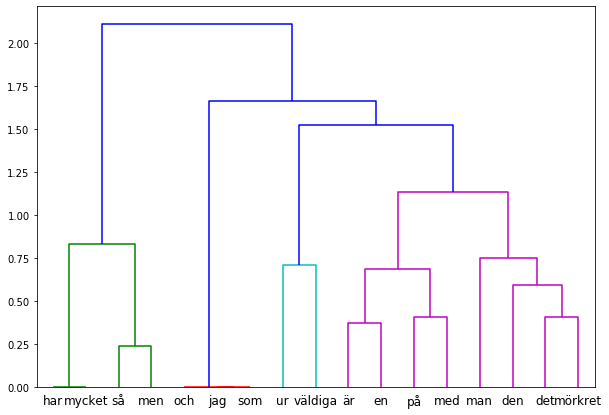

In [102]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(Z.todense(), 'ward')

labelList = tokens_of_interest

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True)
plt.show()

In [ ]:
import unittest
import text_corpus

class Test_CorpusVectorizer(unittest.TestCase):
    
    def setUp(self):
        pass
    
    def create_corpus(self):
        filename = '../data/test_corpus.zip'
        meta_extract = dict(year=r".{5}(\d{4})\_.*", serial_no=".{9}\_(\d+).*")
        reader = utility.TextFilesReader(filename, meta_extract=meta_extract, compress_whitespaces=True, dehyphen=True)
        kwargs = dict(isalnum=True, to_lower=True, deacc=False, min_len=2, max_len=None, numerals=False)
        corpus = text_corpus.ProcessedCorpus(reader, **kwargs)
        return corpus
    
    def test_fit_transform_(self):
        corpus = self.create_corpus()
        vectorizer = CorpusVectorizer()
        vectorizer.fit_transform(corpus)
        #print(vectorizer.vocabulary)
        
    def test_word_counts(self):
        corpus = self.create_corpus()
        vectorizer = CorpusVectorizer()
        X = vectorizer.fit_transform(corpus)
        word_counts = vectorizer.word_counts
        print(word_counts)

unittest.main(argv=['first-arg-is-ignored'], exit=False)


Load saved data

Find word with frequency > 10000

In [ ]:
# df_Zy.sum().where(lambda x: x>= 10000).sort_values().dropna()

Normalize to relative frequency

In [ ]:
#Xn = normalize(X, axis=1, norm='l1')
#Y = collapse_to_year_matrix(X, df_documents)
#df = pd.DataFrame(Y, columns=list(vectorizer.get_feature_names()))
#df.to_excel('test.xlsx')

if False:
    df = pd.DataFrame(X.toarray(), columns=list(vectorizer.get_feature_names()))
    df['year'] = df.index + 45
    df = df.set_index('year')
    df['year'] =  pd.Series(df.index).apply(lambda x: documents[x][0])
    %matplotlib inline
    df[['krig']].plot() #.loc[df["000"]==49]
